In [2]:
import pandas as pd
import numpy as np

# Sample DataFrame structure based on user's description for demonstration.
# In actual implementation, this should be replaced with the provided dataset loading.

# Create a sample dataframe with relevant columns
data = pd.read_csv('ev_charging_patterns.csv')

# Create a DataFrame
df = pd.DataFrame(data)

In [18]:
# Step 1: Data Cleaning and Preprocessing
missing_values = df.isnull().sum()

# Handle Missing Values in critical columns.
df.dropna(subset=['Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)', 'Charging Cost (USD)'], inplace=True)

# Convert Charging Start Time and Charging End Time to datetime format
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])
df['Charging End Time'] = pd.to_datetime(df['Charging End Time'])

# Calculate Charging Duration if needed (assuming dataset charging duration might need validation)
df['Calculated Charging Duration'] = (df['Charging End Time'] - df['Charging Start Time']).dt.total_seconds() / 3600

# Calculate Charging Rate (kW) if not aligned
df['Charging Rate (kW)'] = df['Energy Consumed (kWh)'] / df['Charging Duration (hours)']

# Calculate Cost per kWh for analysis of cost efficiency
df['Cost per kWh'] = df['Charging Cost (USD)'] / df['Energy Consumed (kWh)']


In [ ]:
# Step 2: Feature Extraction

# Extract Hour of Day and Day of Week from Charging Start Time
df['Hour of Day'] = df['Charging Start Time'].dt.hour
df['Day of Week'] = df['Charging Start Time'].dt.day_name()

# Define Time of Day segmentation
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df['Time of Day'] = df['Hour of Day'].apply(get_time_of_day)


   Hour of Day Day of Week Time of Day
0            0      Monday       Night
1            1      Monday       Night
2            2      Monday       Night
3            3      Monday       Night
4            4      Monday       Night


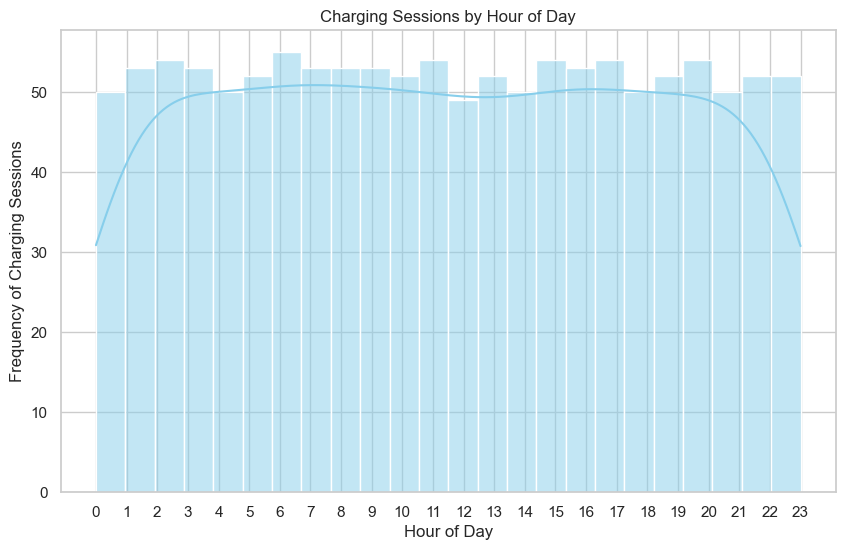

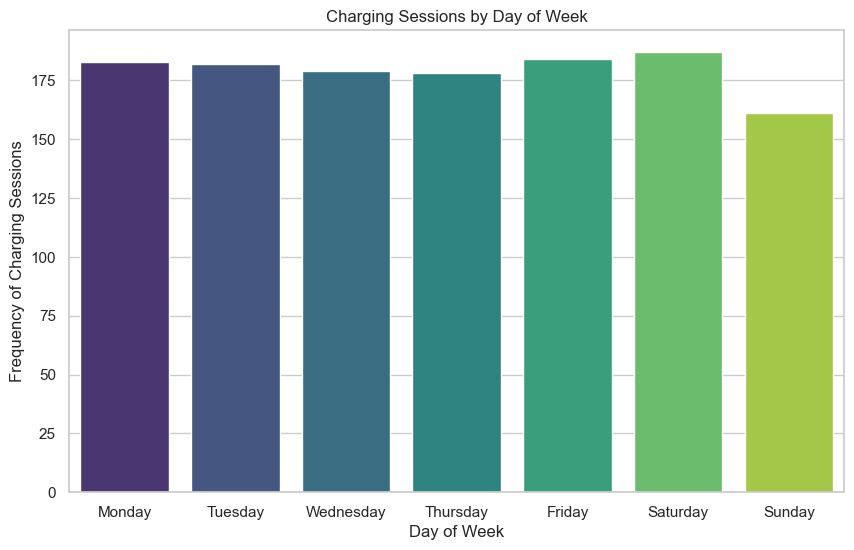

Text(0.5, 1.0, 'Distribution of Charging Duration (hours)')

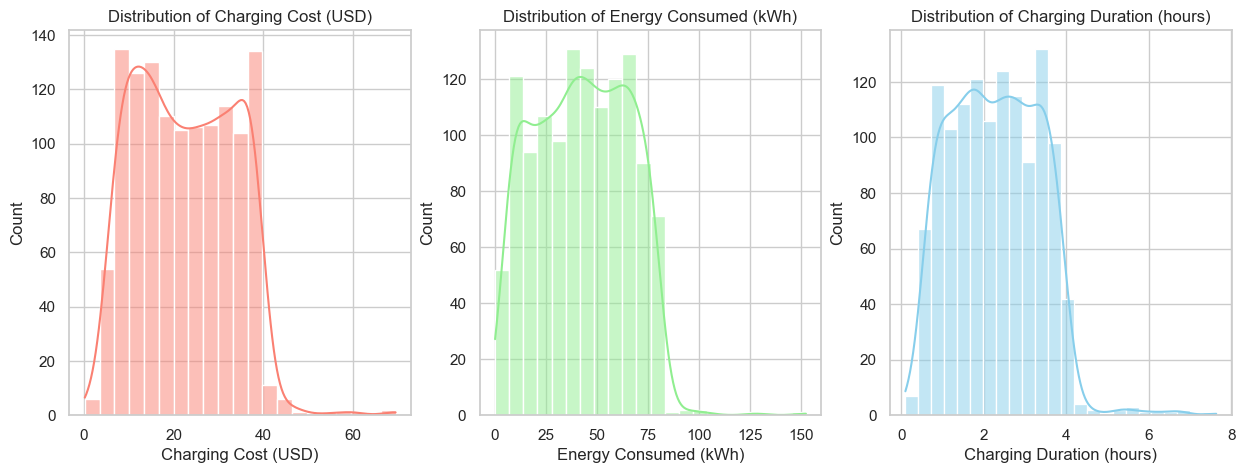

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Exploratory Data Analysis (EDA)

# Setting up the visual style for clarity
sns.set_theme(style="whitegrid")

# Step 3.1: Univariate Analysis
# Histogram of 'Hour of Day' to visualize charging frequency by hour
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour of Day'], bins=24, kde=True, color="skyblue")
plt.title("Charging Sessions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency of Charging Sessions")
plt.xticks(range(0, 24))
plt.show()

# Histogram of 'Day of Week' to observe charging frequency by day
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of Week', data=df, palette="viridis", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Charging Sessions by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Frequency of Charging Sessions")
plt.show()

# Examine distributions for Charging Cost (USD), Energy Consumed (kWh), and Charging Duration (hours).
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Charging Cost (USD)'], kde=True, color="salmon")
plt.title("Distribution of Charging Cost (USD)")

plt.subplot(1, 3, 2)
sns.histplot(df['Energy Consumed (kWh)'], kde=True, color="lightgreen")
plt.title("Distribution of Energy Consumed (kWh)")

plt.subplot(1, 3, 3)
sns.histplot(df['Charging Duration (hours)'], kde=True, color="skyblue")
plt.title("Distribution of Charging Duration (hours)")

[`kde`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fzhanghansheng%2FDesktop%2Fece143%2Fproject%2FEV-analysis%2Ftime.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X13sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A11%2C%22character%22%3A41%7D%7D%5D%2C%2232eb9bf0-ff25-428a-b75d-8be65ba131b6%22%5D "Go to definition") 是核密度估计（Kernel Density Estimation）的缩写。核密度估计是一种非参数方法，用于估计随机变量的概率密度函数。在数据可视化中，[`kde`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fzhanghansheng%2FDesktop%2Fece143%2Fproject%2FEV-analysis%2Ftime.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X13sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A11%2C%22character%22%3A41%7D%7D%5D%2C%2232eb9bf0-ff25-428a-b75d-8be65ba131b6%22%5D "Go to definition") 曲线可以帮助我们平滑地展示数据的分布情况，而不是使用直方图的离散柱状图。通过设置 [`kde=True`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fzhanghansheng%2FDesktop%2Fece143%2Fproject%2FEV-analysis%2Ftime.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X13sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A11%2C%22character%22%3A41%7D%7D%5D%2C%2232eb9bf0-ff25-428a-b75d-8be65ba131b6%22%5D "Go to definition")，可以在直方图上叠加一条平滑的密度曲线。

Text(0, 0.5, 'Energy Consumed (kWh)')

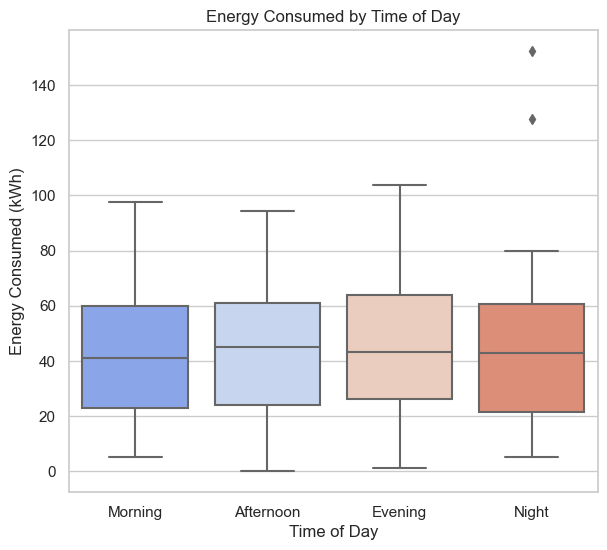

In [26]:
# Step 3.2: Bivariate Analysis
# Time of Day and Charging Demand: Plot Energy Consumed (kWh) and Charging Cost (USD) against Time of Day and Hour of Day to identify peak demand times.
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Time of Day', y='Energy Consumed (kWh)', data=df, palette="coolwarm", order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title("Energy Consumed by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Energy Consumed (kWh)")


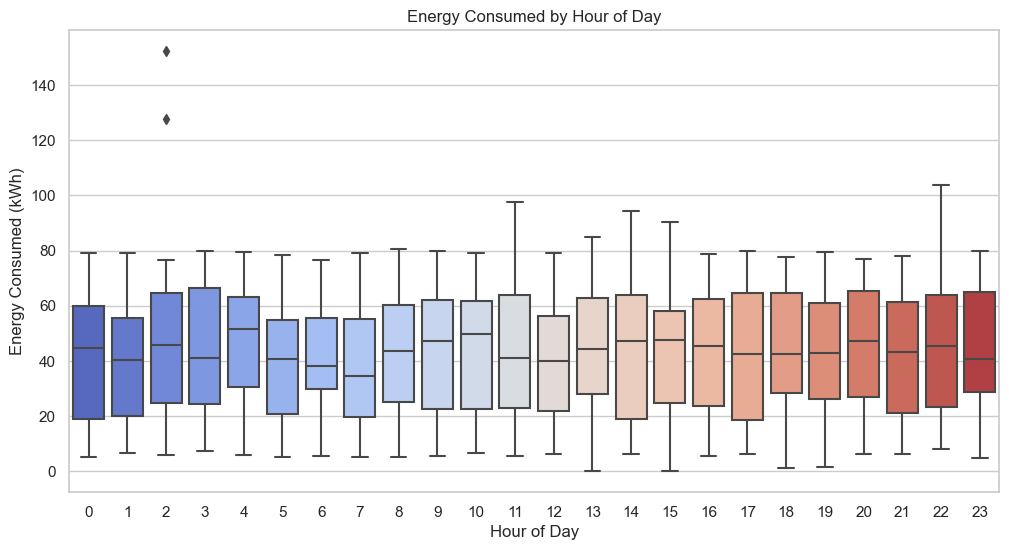

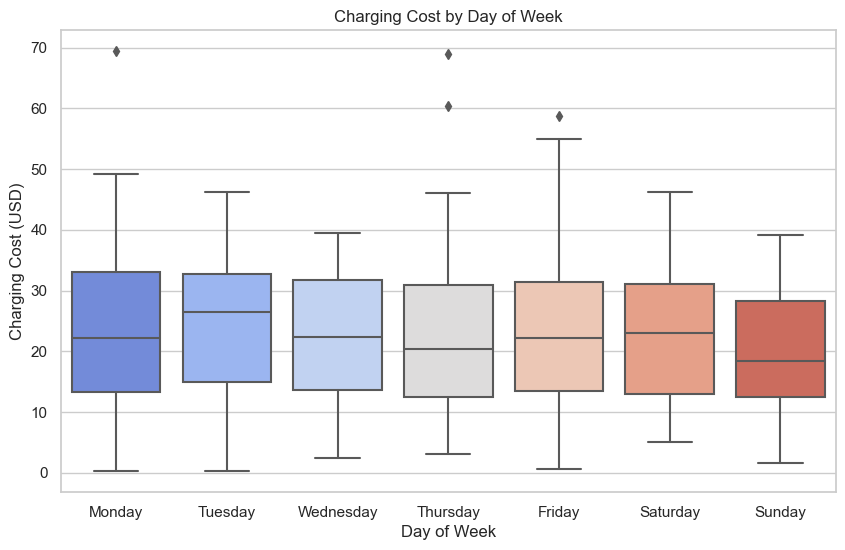

In [27]:
# Plot 'Energy Consumed (kWh)' by 'Hour of Day' to observe peak energy demand by time of day
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour of Day', y='Energy Consumed (kWh)', data=df, palette="coolwarm")
plt.title("Energy Consumed by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Energy Consumed (kWh)")
plt.show()

# Plot 'Charging Cost (USD)' by 'Day of Week' to observe cost patterns by day
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day of Week', y='Charging Cost (USD)', data=df, palette="coolwarm", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Charging Cost by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Charging Cost (USD)")
plt.show()

热力图（Heatmap）是一种数据可视化工具，用于显示矩阵数据的值，通过颜色的深浅来表示数值的大小。热力图通常用于展示两个变量之间的关系或多个变量的交互作用。以下是解读热力图的步骤和要点：

1. **颜色表示数值**：热力图中的颜色表示矩阵中每个单元格的数值。通常，颜色越深表示数值越大，颜色越浅表示数值越小。具体的颜色映射可以通过图例（color bar）来查看。

2. **轴标签**：热力图的横轴和纵轴分别表示两个变量。在你的代码中，横轴表示一天中的小时（Hour of Day），纵轴表示一周中的天（Day of Week）。

3. **数值注释**：有些热力图会在每个单元格中显示具体的数值，这样可以更直观地看到每个单元格的数值大小。在你的代码中，[`annot=True`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fzhanghansheng%2FDesktop%2Fece143%2Fproject%2FEV-analysis%2Ftime.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A41%7D%7D%5D%2C%2242b44491-046f-42f6-922a-3b98dab3a554%22%5D "Go to definition") 参数表示在每个单元格中显示数值，[`fmt=".0f"`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fzhanghansheng%2FDesktop%2Fece143%2Fproject%2FEV-analysis%2Ftime.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A53%7D%7D%5D%2C%2242b44491-046f-42f6-922a-3b98dab3a554%22%5D "Go to definition") 表示数值格式为整数。

4. **图例（Color Bar）**：图例显示了颜色与数值的对应关系。在你的代码中，`cbar_kws={'label': 'Average Charging Cost (USD)'}` 参数为图例添加了标签，表示颜色对应的数值是平均充电成本（美元）。

通过解读热力图，可以直观地看到数据的分布和模式。例如，在你的代码中，热力图展示了不同时间和不同天的平均充电成本。通过观察颜色的深浅，可以识别出充电成本的高峰时段和高峰天。

以下是你的代码生成的热力图的解读示例：


In [ ]:
# Step 3.3: Multivariate Analysis with Heatmap
# Heatmap for 'Hour of Day' vs 'Day of Week' to identify peak times and days
# Calculating the average cost by hour and day
heatmap_data = df.pivot_table(values='Charging Cost (USD)', index='Day of Week', columns='Hour of Day', aggfunc='mean').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Average Charging Cost (USD)'})
plt.title("Average Charging Cost by Hour of Day and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

- 这段代码首先通过数据透视表计算了每个小时和每一天的平均充电成本。
- 然后使用 `seaborn` 库的 [`heatmap`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fzhanghansheng%2FDesktop%2Fece143%2Fproject%2FEV-analysis%2Ftime.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A4%7D%7D%5D%2C%2242b44491-046f-42f6-922a-3b98dab3a554%22%5D "Go to definition") 函数绘制热力图，颜色映射使用 "YlGnBu" 调色板，表示从黄色到绿色再到蓝色的渐变。
- 热力图中每个单元格的颜色表示对应时间和天的平均充电成本，颜色越深表示成本越高。
- 图例显示了颜色与平均充电成本的对应关系，帮助解读图中的数值。

通过观察热力图，可以识别出充电成本的高峰时段和高峰天，从而优化充电策略。

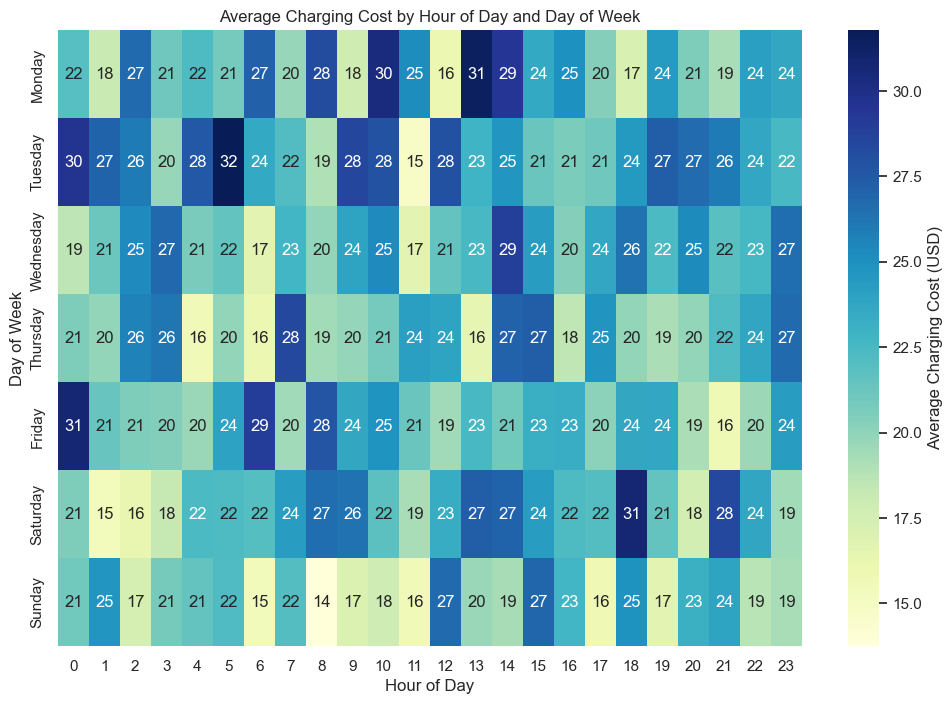

In [17]:
# Step 3.3: Multivariate Analysis with Heatmap
# Heatmap for 'Hour of Day' vs 'Day of Week' to identify peak times and days
# Calculating the average cost by hour and day
heatmap_data = df.pivot_table(values='Charging Cost (USD)', index='Day of Week', columns='Hour of Day', aggfunc='mean').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Average Charging Cost (USD)'})
plt.title("Average Charging Cost by Hour of Day and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()


热力图（Heatmap）是一种数据可视化工具，用于显示矩阵数据的值，通过颜色的深浅来表示数值的大小。热力图通常用于展示两个变量之间的关系或多个变量的交互作用。以下是解读热力图的步骤和要点：

1. **颜色表示数值**：热力图中的颜色表示矩阵中每个单元格的数值。通常，颜色越深表示数值越大，颜色越浅表示数值越小。具体的颜色映射可以通过图例（color bar）来查看。

2. **轴标签**：热力图的横轴和纵轴分别表示两个变量。在你的代码中，横轴表示一天中的小时（Hour of Day），纵轴表示一周中的天（Day of Week）。

3. **数值注释**：有些热力图会在每个单元格中显示具体的数值，这样可以更直观地看到每个单元格的数值大小。在你的代码中，[`annot=True`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fzhanghansheng%2FDesktop%2Fece143%2Fproject%2FEV-analysis%2Ftime.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A41%7D%7D%5D%2C%2242b44491-046f-42f6-922a-3b98dab3a554%22%5D "Go to definition") 参数表示在每个单元格中显示数值，[`fmt=".0f"`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fzhanghansheng%2FDesktop%2Fece143%2Fproject%2FEV-analysis%2Ftime.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A53%7D%7D%5D%2C%2242b44491-046f-42f6-922a-3b98dab3a554%22%5D "Go to definition") 表示数值格式为整数。

4. **图例（Color Bar）**：图例显示了颜色与数值的对应关系。在你的代码中，`cbar_kws={'label': 'Average Charging Cost (USD)'}` 参数为图例添加了标签，表示颜色对应的数值是平均充电成本（美元）。

通过解读热力图，可以直观地看到数据的分布和模式。例如，在你的代码中，热力图展示了不同时间和不同天的平均充电成本。通过观察颜色的深浅，可以识别出充电成本的高峰时段和高峰天。

以下是你的代码生成的热力图的解读示例：


- 这段代码首先通过数据透视表计算了每个小时和每一天的平均充电成本。
- 然后使用 `seaborn` 库的 [`heatmap`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2FUsers%2Fzhanghansheng%2FDesktop%2Fece143%2Fproject%2FEV-analysis%2Ftime.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22X16sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A6%2C%22character%22%3A4%7D%7D%5D%2C%2242b44491-046f-42f6-922a-3b98dab3a554%22%5D "Go to definition") 函数绘制热力图，颜色映射使用 "YlGnBu" 调色板，表示从黄色到绿色再到蓝色的渐变。
- 热力图中每个单元格的颜色表示对应时间和天的平均充电成本，颜色越深表示成本越高。
- 图例显示了颜色与平均充电成本的对应关系，帮助解读图中的数值。

通过观察热力图，可以识别出充电成本的高峰时段和高峰天，从而优化充电策略。

In [ ]:
# Step 3.3: Multivariate Analysis with Heatmap
# Heatmap for 'Hour of Day' vs 'Day of Week' to identify peak times and days
# Calculating the average cost by hour and day
heatmap_data = df.pivot_table(values='Charging Cost (USD)', index='Day of Week', columns='Hour of Day', aggfunc='mean').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Average Charging Cost (USD)'})
plt.title("Average Charging Cost by Hour of Day and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

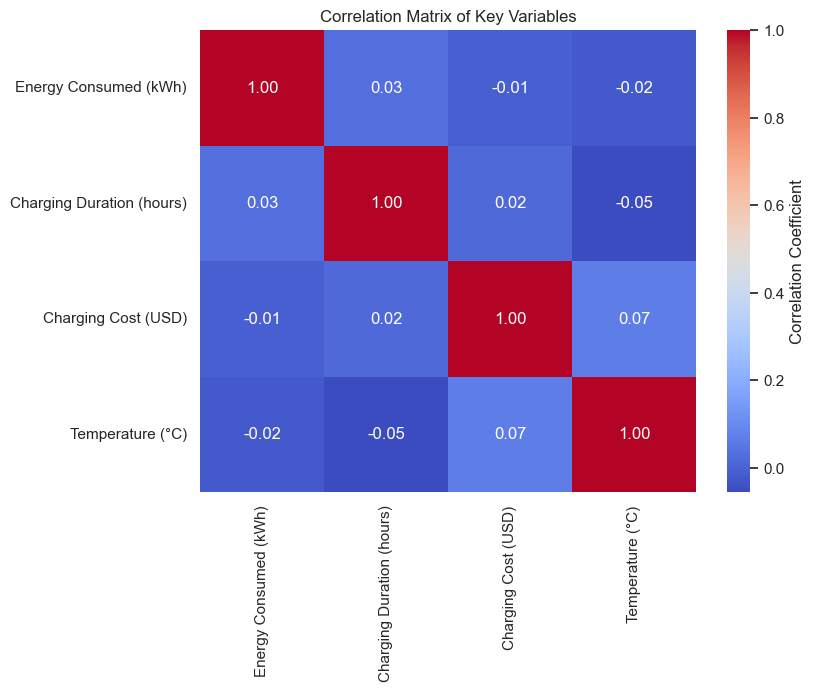

In [20]:
# Step 4: Correlation Analysis
# Compute correlations between key numeric variables
correlation_matrix = df[['Energy Consumed (kWh)', 'Charging Duration (hours)', 'Charging Cost (USD)', 'Temperature (°C)']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Matrix of Key Variables")
plt.show()

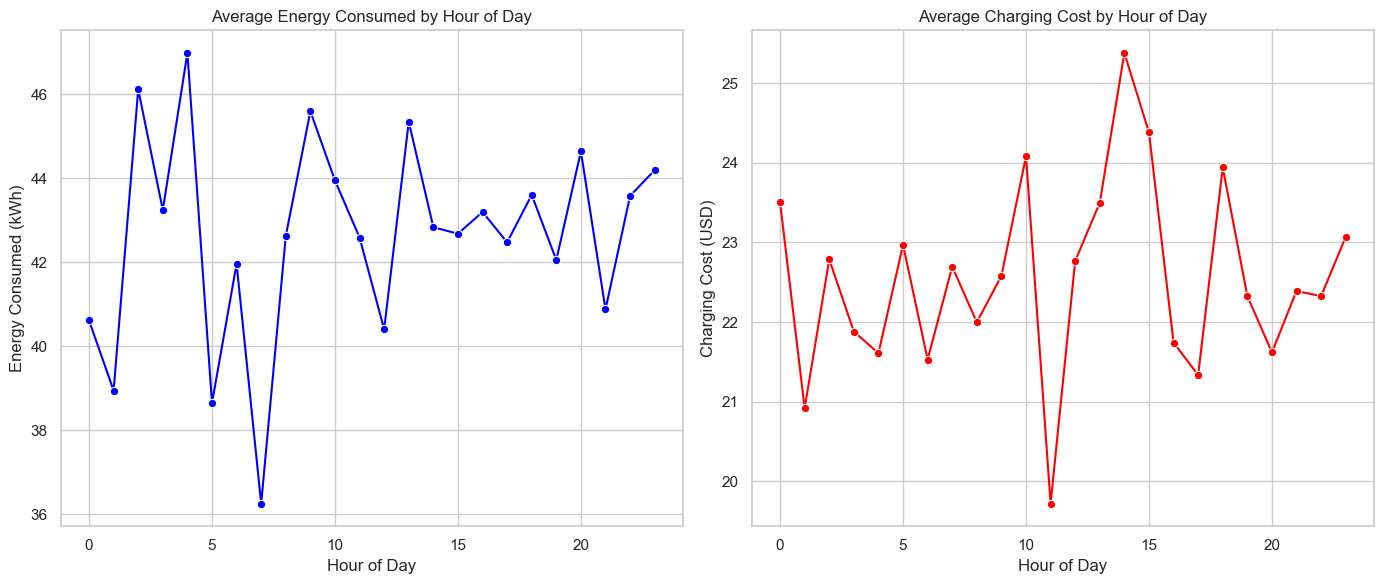

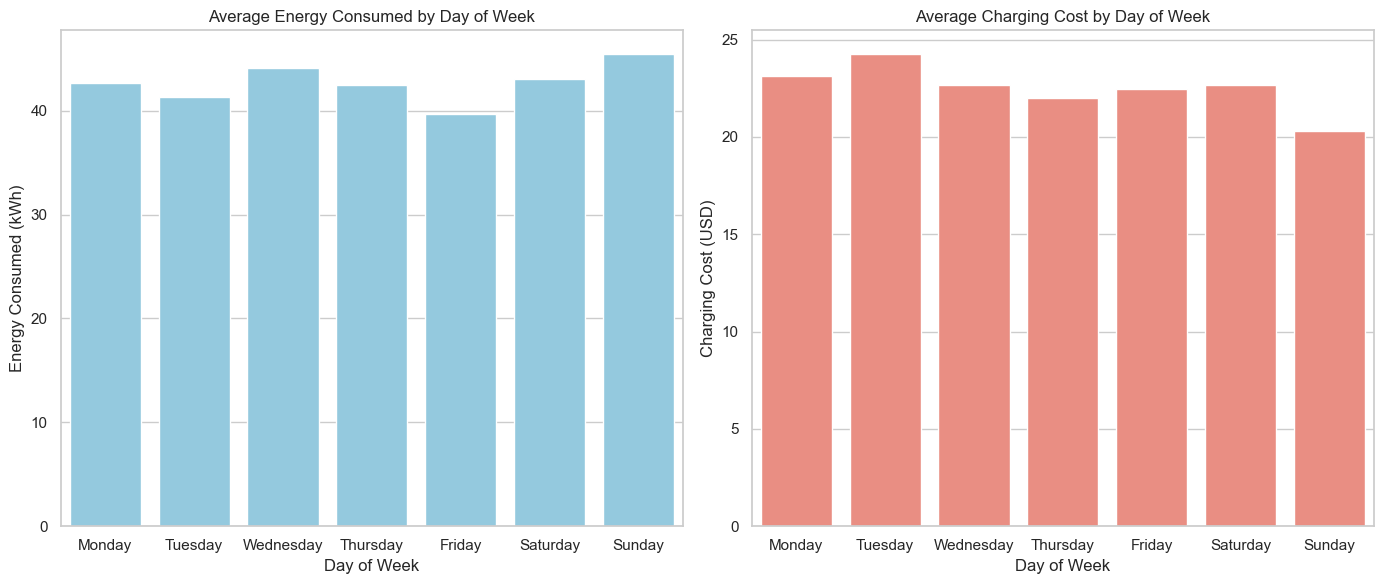

In [23]:
### Step 4: Identify Peak Demand Periods ###

# Hourly Peak Analysis: Average Energy Consumed and Charging Cost by Hour
hourly_peak = df.groupby('Hour of Day').agg({
    'Energy Consumed (kWh)': 'mean',
    'Charging Cost (USD)': 'mean'
}).reset_index()

# Plot Hourly Peaks
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=hourly_peak, x='Hour of Day', y='Energy Consumed (kWh)', color='blue', marker='o')
plt.title("Average Energy Consumed by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Energy Consumed (kWh)")

plt.subplot(1, 2, 2)
sns.lineplot(data=hourly_peak, x='Hour of Day', y='Charging Cost (USD)', color='red', marker='o')
plt.title("Average Charging Cost by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Charging Cost (USD)")
plt.tight_layout()
plt.show()

# Weekly Peak Analysis: Average Energy Consumed and Charging Cost by Day of the Week
weekly_peak = df.groupby('Day of Week').agg({
    'Energy Consumed (kWh)': 'mean',
    'Charging Cost (USD)': 'mean'
}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

# Plot Weekly Peaks
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=weekly_peak, x='Day of Week', y='Energy Consumed (kWh)', color='skyblue')
plt.title("Average Energy Consumed by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Energy Consumed (kWh)")

plt.subplot(1, 2, 2)
sns.barplot(data=weekly_peak, x='Day of Week', y='Charging Cost (USD)', color='salmon')
plt.title("Average Charging Cost by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Charging Cost (USD)")
plt.tight_layout()
plt.show()

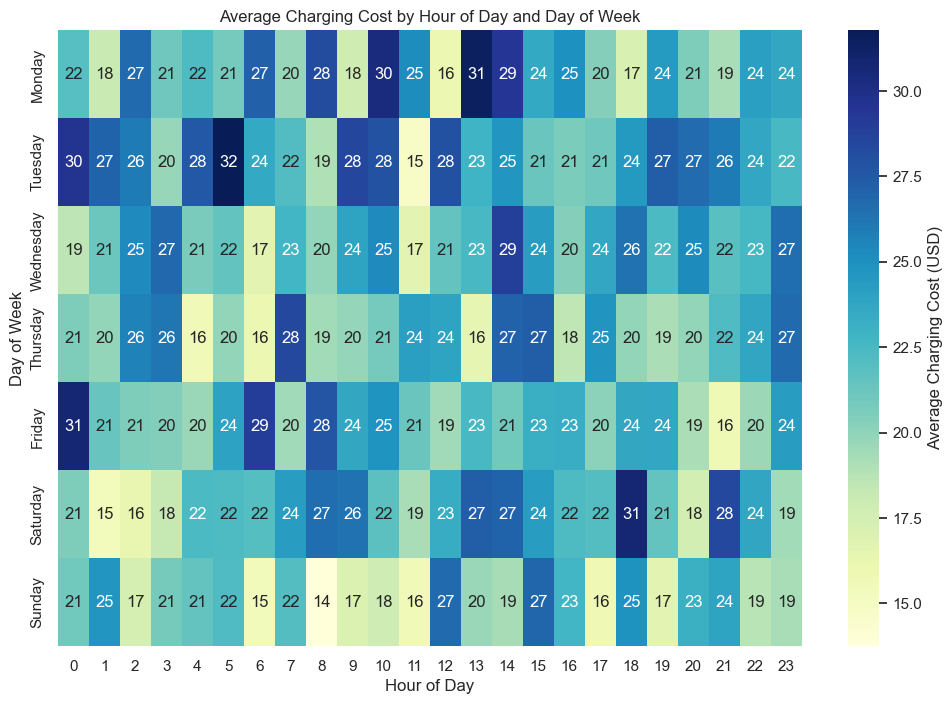

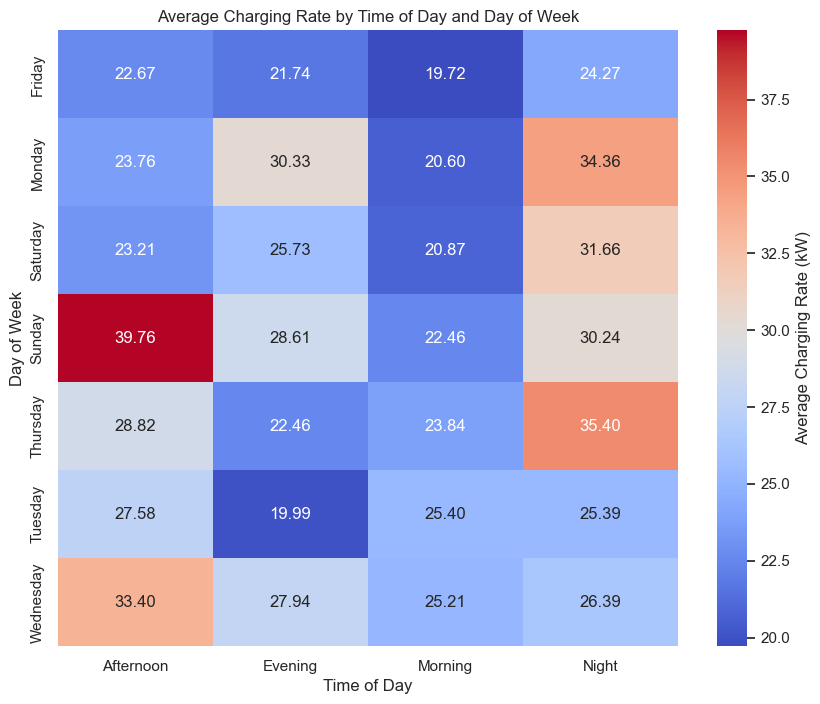

In [30]:
### Step 5: Evaluate the Effect of Peak Demand on Costs ###

# Cost Analysis Heatmap: Average Charging Cost by Hour and Day
heatmap_data = df.pivot_table(values='Charging Cost (USD)', index='Day of Week', columns='Hour of Day', aggfunc='mean').reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Average Charging Cost (USD)'})
plt.title("Average Charging Cost by Hour of Day and Day of Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

# Rate Variation Analysis: Average Charging Rate by Time of Day and Day of Week
rate_variation = df.groupby(['Day of Week', 'Time of Day'])['Charging Rate (kW)'].mean().unstack()

plt.figure(figsize=(10, 8))
sns.heatmap(rate_variation, cmap="coolwarm", annot=True, fmt=".2f", cbar_kws={'label': 'Average Charging Rate (kW)'})
plt.title("Average Charging Rate by Time of Day and Day of Week")
plt.xlabel("Time of Day")
plt.ylabel("Day of Week")
plt.show()